In [89]:
import tensorflow as tf
from tensorflow.python.platform import gfile
import cv2
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline

In [104]:
img = cv2.imread('hand.jpg')
res = cv2.resize(img, dsize=(576, 1024), interpolation=cv2.INTER_CUBIC)
aa = res/255
aa = aa.reshape(1,aa.shape[0],aa.shape[1],aa.shape[2])

In [105]:
tf.reset_default_graph()

with tf.Session() as sess:    
    with gfile.FastGFile('./new_model','rb') as f:
        graph_def = tf.GraphDef()
        
    graph_def.ParseFromString(f.read())
    tf.import_graph_def(graph_def)
    
    graph = tf.get_default_graph()        
    sess.graph.as_default()
    
    inputTensor = graph.get_tensor_by_name('import/input_1:0')
    outputTensor = graph.get_tensor_by_name('import/output:0')
    

    output = sess.run(outputTensor, feed_dict={inputTensor: aa})

In [92]:
def get_modified_output(output):
    output_flat = output.reshape(-1)
    
    new_output = [None] * int(output_flat.shape[0]/2)
    
    for i in range(0, output_flat.shape[0], 2):
        new_output[int(i/2)] = output_flat[i]
        
    return np.array(new_output)

In [107]:
new_output = get_modified_output(output)

In [138]:
output_arr = np.around(new_output * 255).astype(int).reshape(1024, 576)

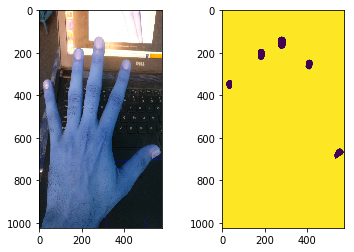

In [139]:
f, axarr = plt.subplots(1,2)
axarr[0].imshow(res)
axarr[1].imshow(output_arr)